In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import pingouin as pg
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import math
import seaborn as sns
import pickle
from scipy.stats import fisher_exact

/Users/jialexu/opt/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/Users/jialexu/opt/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


## Phenotype analysis

In [2]:
df_snp_geno_raw = pd.read_csv('/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/SNP_prioritization/LD_5_12451112.recode.vcf',
                                 header = 0,
                             index_col=False,
                             sep = '\t',
                            skiprows=12
                            )

In [3]:
df_snp_geno_raw

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,20200204_Plate1_10A,...,20201222_Plate2_8G,20201222_Plate2_8H,20201222_Plate2_9A,20201222_Plate2_9B,20201222_Plate2_9C,20201222_Plate2_9D,20201222_Plate2_9E,20201222_Plate2_9F,20201222_Plate2_9G,20201222_Plate2_9H
0,chr5,12118947,.,C,T,.,PASS,AR2=1;DR2=1;AF=0.25,GT:DS:GP,"0/0:0:1,0,0",...,"0/0:0:1,0,0","0/0:0:1,0,0","0/0:0:1,0,0","0/0:0:1,0,0","0/1:1:0,1,0","0/0:0:1,0,0","0/0:0:1,0,0","0/1:1:0,1,0","0/1:1:0,1,0","1/1:2:0,0,1"
1,chr5,12118955,.,G,A,.,PASS,AR2=1;DR2=1;AF=0.094,GT:DS:GP,"0/1:1:0,1,0",...,"0/1:1:0,1,0","0/0:0:1,0,0","0/1:1:0,1,0","0/0:0:1,0,0","0/1:1:0,1,0","0/0:0:1,0,0","0/0:0:1,0,0","0/0:0:1,0,0","0/0:0:1,0,0","0/0:0:1,0,0"
2,chr5,12119009,.,A,G,.,PASS,AR2=1;DR2=1;AF=0.85,GT:DS:GP,"0/1:1:0,1,0",...,"0/1:1:0,1,0","0/1:1:0,1,0","0/1:1:0,1,0","0/1:1:0,1,0","1/1:2:0,0,1","0/1:1:0,1,0","0/0:0:1,0,0","0/1:1:0,1,0","0/1:1:0,1,0","1/1:2:0,0,1"
3,chr5,12119011,.,A,G,.,PASS,AR2=1;DR2=1;AF=0.85,GT:DS:GP,"0/1:1:0,1,0",...,"0/1:1:0,1,0","0/1:1:0,1,0","0/1:1:0,1,0","0/1:1:0,1,0","1/1:2:0,0,1","0/1:1:0,1,0","0/0:0:1,0,0","0/1:1:0,1,0","0/1:1:0,1,0","1/1:2:0,0,1"
4,chr5,12119064,.,A,T,.,PASS,AR2=1;DR2=1;AF=0.0096,GT:DS:GP,"0/0:0:1,0,0",...,"0/0:0:1,0,0","0/0:0:1,0,0","0/0:0:1,0,0","0/0:0:1,0,0","0/0:0:1,0,0","0/0:0:1,0,0","0/0:0:1,0,0","0/0:0:1,0,0","0/0:0:1,0,0","0/0:0:1,0,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14117,chr5,13471387,.,C,A,.,PASS,AR2=1;DR2=1;AF=0.099,GT:DS:GP,"0/1:1:0,1,0",...,"0/1:1:0,1,0","0/0:0:1,0,0","0/1:1:0,1,0","0/0:0:1,0,0","0/1:1:0,1,0","0/0:0:1,0,0","0/0:0:1,0,0","0/0:0:1,0,0","0/0:0:1,0,0","0/0:0:1,0,0"
14118,chr5,13471610,.,T,A,.,PASS,AR2=1;DR2=1;AF=0.037,GT:DS:GP,"0/0:0:1,0,0",...,"0/0:0:1,0,0","0/0:0:1,0,0","0/0:0:1,0,0","0/0:0:1,0,0","0/0:0:1,0,0","0/0:0:1,0,0","0/0:0:1,0,0","0/0:0:1,0,0","0/1:1:0,1,0","0/1:1:0,1,0"
14119,chr5,13471611,.,A,G,.,PASS,AR2=1;DR2=1;AF=0.16,GT:DS:GP,"0/1:1:0,1,0",...,"0/1:1:0,1,0","0/1:1:0,1,0","0/1:1:0,1,0","0/1:1:0,1,0","0/0:0:1,0,0","0/1:1:0,1,0","0/1:1:0,1,0","0/0:0:1,0,0","0/1:1:0,1,0","0/0:0:1,0,0"
14120,chr5,13471616,.,G,A,.,PASS,AR2=1;DR2=1;AF=0.72,GT:DS:GP,"0/1:1:0,1,0",...,"0/1:1:0,1,0","0/1:1:0,1,0","0/1:1:0,1,0","0/1:1:0,1,0","1/1:2:0,0,1","0/1:1:0,1,0","0/1:1:0,1,0","1/1:2:0,0,1","0/1:1:0,1,0","1/1:2:0,0,1"


In [5]:
df_snp_geno_raw.index = df_snp_geno_raw['#CHROM']+":"+df_snp_geno_raw['POS'].astype('str')

In [6]:
df_snp_geno=df_snp_geno_raw.iloc[:, 9:]

In [7]:
df_pheno = pd.read_csv('/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/Gwas/data/phenotype/20220822/5_pheno_LTFDE_pro_20220822.txt',
                      sep = ' ',header=None)
df_pheno_b = df_pheno.loc[df_pheno[2]<df_pheno[2].quantile(0.10)]
df_pheno_t = df_pheno.loc[df_pheno[2]>df_pheno[2].quantile(0.90)]

In [8]:
df_snp_geno_dose = df_snp_geno.iloc[:, 9:].apply(lambda x: (x.str[0].astype('int')+x.str[2].astype('int')))
df_snp_geno_dose = df_snp_geno_dose.transpose()

In [9]:
p_maf = df_snp_geno_dose.sum()/(df_snp_geno_dose.shape[0]*2)
t_maf = df_snp_geno_dose.loc[df_snp_geno_dose.index.isin(df_pheno_t[1])].sum()/(df_snp_geno_dose.loc[df_snp_geno_dose.index.isin(df_pheno_t[1])].shape[0]*2)
b_maf = df_snp_geno_dose.loc[df_snp_geno_dose.index.isin(df_pheno_b[1])].sum()/(df_snp_geno_dose.loc[df_snp_geno_dose.index.isin(df_pheno_b[1])].shape[0]*2)
df_maf = pd.concat((p_maf, t_maf, b_maf),axis=1)
df_maf.columns = ['p_maf', 't_maf', 'b_maf']

In [10]:
df_perm_dic = {}
perm_round = 1000
for i in range(perm_round):
    df_perm = df_snp_geno_dose.sample(axis=0, n=560)
    df_perm_1 = df_perm.iloc[:281, :]
    df_perm_2 = df_perm.iloc[281:, :]
    df_perm_1 = df_perm_1.sum()/(2*df_perm_1.shape[0])
    df_perm_2 = df_perm_2.sum()/(2*df_perm_2.shape[0])
    df_perm_diff = df_perm_1-df_perm_2
    df_perm_dic.update({i:df_perm_diff})
df_perm_res = pd.DataFrame(df_perm_dic)


df_perm_res['95%CI_right'] = df_perm_res.iloc[:, :perm_round].mean(axis=1)+1.95*df_perm_res.std(axis=1)
df_perm_res['95%CI_left'] = df_perm_res.iloc[:, :perm_round].mean(axis=1)-1.95*df_perm_res.std(axis=1)
df_perm_res['diff_mean'] = df_perm_res.iloc[:, :perm_round].mean(axis=1)

In [137]:
df_res = pd.concat((df_perm_res[['95%CI_right','95%CI_left', 'diff_mean']], df_maf), axis=1)
df_res['maf_diff'] = df_res['t_maf']-df_res['b_maf']
def sig(left, right, ts):
    if ts<left or ts>right:
        return 't'
    else:
        return 'f'
    
df_res['test'] = df_res.apply(lambda x: sig(x['95%CI_left'], x['95%CI_right'],x['maf_diff']), axis=1)
df_res.loc[['chr5:66958636']]

,95%CI_right,95%CI_left,diff_mean,p_maf,t_maf,b_maf,maf_diff,test
chr5:66958636,0.042171,-0.041096,0.000567,0.13513,0.100753,0.156716,-0.055963,t


In [15]:
df_snp_geno_dose['chr5:12451112']

20200204_Plate1_11B    0
20200204_Plate1_11D    0
20200204_Plate1_11E    0
20200204_Plate1_11F    0
20200204_Plate1_11G    0
                      ..
20201222_Plate2_9D     0
20201222_Plate2_9E     0
20201222_Plate2_9F     1
20201222_Plate2_9G     1
20201222_Plate2_9H     2
Name: chr5:12451112, Length: 5750, dtype: int64

In [16]:
df_target_snp_dose = df_snp_geno_dose[['chr5:12454571','chr5:12454585','chr5:13285896','chr5:12451112']]
dic_res = {}
for snp in df_target_snp_dose.columns:
    homo1 = df_target_snp_dose.loc[df_target_snp_dose[snp]==0].index
    het = df_target_snp_dose.loc[df_target_snp_dose[snp]==1].index
    homo2 = df_target_snp_dose.loc[df_target_snp_dose[snp]==2].index
    ra = df_snp_geno_raw.loc[snp]['REF']#find reference allele for the snp
    aa = df_snp_geno_raw.loc[snp]['ALT']#find alternative allele for the snp
    f_aa = df_snp_geno_raw.loc[snp]['INFO'].split(";")[2].split("=")[1]
    if float(f_aa)<0.5:
        mia = aa
        mja = ra
        mia_dose = 2
    else:
        mia = ra
        mja = aa
        mia_dose = 0
        
    homo1 = df_target_snp_dose.loc[df_target_snp_dose[snp]==mia_dose].index
    het = df_target_snp_dose.loc[df_target_snp_dose[snp]==1].index
    homo2 = df_target_snp_dose.loc[df_target_snp_dose[snp]==2-mia_dose].index
    sample_size_list = [len(homo1), len(het), len(homo2)]
    results_list = []
    df_temp_list = []
    for genotype, symbol in zip([homo1, het, homo2], [mia*2, mia+mja, mja*2]):
        df_series_pheno = df_pheno.loc[df_pheno[1].isin(genotype)][2]
        df_series_pheno.rename('pheno', inplace=True)
        sample_size = df_series_pheno.shape[0]
        df_series_geno = pd.Series([symbol]*sample_size, index = df_series_pheno.index)
        df_series_geno.rename('geno', inplace=True)
        df_temp_list.append(pd.concat((df_series_pheno, df_series_geno),axis=1))
        mean = df_series_pheno.mean()
        std = df_series_pheno.sem()
        results_list.append(pd.Series([mean, std, sample_size]))
    ##make a dataframe for multiple-test 
    df_mulitple_test = pd.concat(df_temp_list)
    
    test_res = pg.pairwise_tukey(data=df_mulitple_test, dv='pheno',between='geno').round(3)
    
    df_geno_pheno_summary = pd.concat(results_list,axis=1).transpose()
    df_geno_pheno_summary.columns = ['mean', 'sem', 'n']
    df_geno_pheno_summary['n'] = df_geno_pheno_summary['n'].astype('int')
    df_geno_pheno_summary.index = ['hm_ref', 'het', 'hm_alt']
    df_geno_pheno = pd.concat(df_temp_list)
    dic_res.update({snp:[df_geno_pheno_summary, df_mulitple_test,test_res,  sample_size_list]})


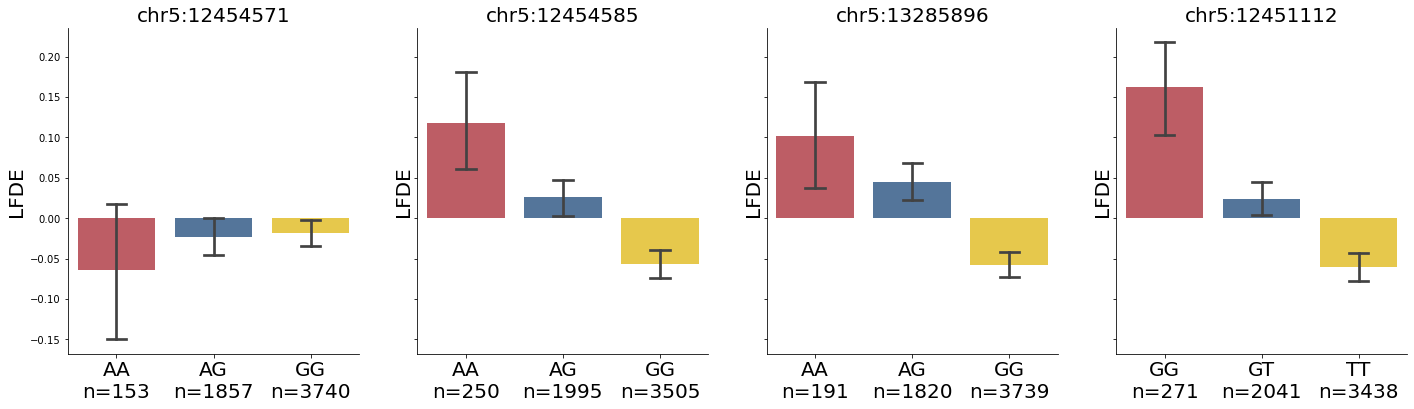

In [19]:
f,ax = plt.subplots(1,len(dic_res.keys()), figsize=(24, 6),sharey=True)
for i,snp in enumerate(dic_res.keys()):
    df = dic_res[snp][1]
    colors = {df['geno'].unique()[0]:'#cd4d57', 
              df['geno'].unique()[1]:'#4974a5', 
              df['geno'].unique()[2]:'#FFD733'}
    sns.barplot(x = "geno",y = "pheno", 
                data = df, palette=colors,ax=ax[i], capsize=0.2, ci=68)
    ax[i].set_title(snp, fontsize=20)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].set_xticks(np.arange(0,3))
    xlabels = []
    for geno,n in zip(list(df['geno'].unique()), dic_res[snp][3]):
        xlabels.append(geno+'\nn='+str(n))
    ax[i].set_xticklabels(xlabels, fontsize=20)
    ax[i].set_ylabel('LFDE', fontsize=20)
    ax[i].set_xlabel('')
plt.show()

## Analyze signficant SNPs in each LD block

In [3]:
##import data of regulatory elements
input_dir = '/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/Candidate_gene_prioritization/danRer11_annotations/'
df_cPADRE_list = []
for file in os.listdir(input_dir):
    if 'cPADREs' in file:
        stage = file.split("_")[0]
        df_cPADRE = pd.read_csv(input_dir+file,sep = '\t', header=None)
        df_cPADRE = df_cPADRE.loc[df_cPADRE[0].apply(lambda x: len(x))<=5].iloc[:, :]
        df_cPADRE['stage'] = stage
        df_cPADRE_list.append(df_cPADRE)

df_cPADRE_all_stage = pd.concat(df_cPADRE_list)
df_cPADRE_all_stage

,0,1,2,3,4,5,6,7,8,stage
22,chr17,398,1481,10_Quies,1000,.,398,1481,"161,162,163",Epi75
23,chr17,6128,7906,10_Quies,1000,.,6128,7906,"161,162,163",Epi75
24,chr17,24514,24933,10_Quies,1000,.,24514,24933,"161,162,163",Epi75
25,chr17,26863,27492,10_Quies,1000,.,26863,27492,"161,162,163",Epi75
26,chr17,34997,35381,10_Quies,1000,.,34997,35381,"161,162,163",Epi75
...,...,...,...,...,...,...,...,...,...,...
131176,chr14,52625052,52626368,7_EnhWk1,1000,.,52625052,52626368,"255,127,0",Hpf12
131177,chr14,52634791,52635517,10_Quies,1000,.,52634791,52635517,"161,162,163",Hpf12
131178,chr14,52639375,52640101,7_EnhWk1,1000,.,52639375,52640101,"255,127,0",Hpf12
131179,chr14,52642481,52643052,7_EnhWk1,1000,.,52642481,52643052,"255,127,0",Hpf12


In [4]:
traitlist = pd.read_csv('/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/Gwas/data/phenotype/20220822/traits.txt',sep=' ')
traitlist = list(traitlist.columns)[1:]

In [5]:
## read gff3 data
df_gff3 = pd.read_csv('/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/Genome_annotation/20220706/Danio_rerio.GRCz11.105.chr.gff3.gz',skiprows=32, delimiter='\t', header = None)
df_gff3 = df_gff3.dropna()
df_gff3 = df_gff3.loc[df_gff3[0]!='MT']

In [6]:
with open('/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/Gwas/data/LD_block/20230207/ld_block_info_20230207.pkl', 'rb') as f:
    df_ld_block = pickle.load(f)
df_ld_block = df_ld_block.loc[df_ld_block['peak_snp_log10P']>6.81]
dic = {'DET':'TDEN', 'DEAD':'ADED', 'LTFDE':'LFDE', 'DZTD':'TDDZ'}
def trait_convert(convert_map, trait):
    if '_' in trait and trait.split('_')[1] in list(convert_map.keys()):
        return trait.replace(trait.split('_')[1], convert_map[trait.split('_')[1]])
    elif trait in list(convert_map.keys()):
        return convert_map[trait] 
    else:
        return trait
df_ld_block['trait'] = df_ld_block['trait'].apply(lambda x: trait_convert(dic, x))

In [7]:
df_cPADRE_unique = df_cPADRE_all_stage.drop_duplicates(subset=[0,1,2])
df_cPADRE_unique

,0,1,2,3,4,5,6,7,8,stage
22,chr17,398,1481,10_Quies,1000,.,398,1481,"161,162,163",Epi75
23,chr17,6128,7906,10_Quies,1000,.,6128,7906,"161,162,163",Epi75
24,chr17,24514,24933,10_Quies,1000,.,24514,24933,"161,162,163",Epi75
25,chr17,26863,27492,10_Quies,1000,.,26863,27492,"161,162,163",Epi75
26,chr17,34997,35381,10_Quies,1000,.,34997,35381,"161,162,163",Epi75
...,...,...,...,...,...,...,...,...,...,...
131176,chr14,52625052,52626368,10_Quies,1000,.,52625052,52626368,"161,162,163",Epi75
131177,chr14,52634791,52635517,10_Quies,1000,.,52634791,52635517,"161,162,163",Epi75
131178,chr14,52639375,52640101,10_Quies,1000,.,52639375,52640101,"161,162,163",Epi75
131179,chr14,52642481,52643052,10_Quies,1000,.,52642481,52643052,"161,162,163",Epi75


In [8]:
def cre_snp_enrichment(SNP_index):
    peak_snp = df_ld_block.index[SNP_index]
    peak_snp_pos = int(peak_snp.split(':')[1])
    peak_snp_logp = df_ld_block.iloc[SNP_index,1]
    trait = df_ld_block.iloc[SNP_index,-1]
    start = df_ld_block.iloc[SNP_index,3]
    end = df_ld_block.iloc[SNP_index,4]
    chr_num = int(peak_snp.split(':')[0])
    chr_id = 'chr'+str(chr_num)
    
    
    #grap all the cis-regulatory elements within a LD block
    df1 = df_cPADRE_unique.loc[(df_cPADRE_unique[0]==chr_id)&\
                                   (df_cPADRE_unique[1]>=start)&\
                                   (df_cPADRE_unique[2]<=end)]
    df2 = df_cPADRE_unique.loc[(df_cPADRE_unique[0]==chr_id)&\
                                   (df_cPADRE_unique[1]<=end)&\
                                   (df_cPADRE_unique[2]>=end)]
    df3 = df_cPADRE_unique.loc[(df_cPADRE_unique[0]==chr_id)&\
                                   (df_cPADRE_unique[1]<=start)&\
                                   (df_cPADRE_unique[2]>=start)]
    df_target_cre = pd.concat([df1,df2,df3])
    #print(df_snp.head())
    #get the total number of cre within the ld block
    cre_num = df_target_cre.shape[0]
    
    #get all the SNPs inside the LD block
    df_snp = df_ld_block.iloc[SNP_index, 0]
    df_snp = df_snp.loc[(df_snp['pos'].astype('int')>=start)&(df_snp['pos'].astype('int')<=end)]
    #find all the significant snps inside the ld block
    df_sig_snp = df_snp.loc[df_snp['-log10_P']>6.81]
    df_sig_snp['trait'] = trait
    df_sig_snp['peak_snp'] = peak_snp
    def func1(x):
        if x>=6.81:
            return 1
        else:
            return 0

    no_sig_snp_list = []
    cre_list = []
    sig_snp_in_cre_list = []
    for cre in df_target_cre.index:
        #get the coordinates of each cre in each LD block
        cre_start = df_target_cre.loc[cre][1]
        cre_end = df_target_cre.loc[cre][2]
        #get significant SNPs in each cre
        df_snp_in_cre = df_sig_snp.loc[(df_sig_snp['pos'].astype(int)>=cre_start)&(df_sig_snp['pos'].astype(int)<=cre_end)]
        df_sig_snp_in_cre = df_snp_in_cre.loc[df_snp_in_cre['-log10_P']>=6.81]
        no_sig_snp = df_sig_snp_in_cre.shape[0]
        #no_sig_snp = df_snp_in_cre[trait].apply(func1).sum()
        if no_sig_snp>0:
            cre_list.append(cre)
            no_sig_snp_list.append(no_sig_snp)
            sig_snp_in_cre_list.append(df_sig_snp_in_cre)
    df_temp = pd.DataFrame({'cre_id':cre_list, 'sig_snp':sig_snp_in_cre_list, 'no_sig_snp':no_sig_snp_list}).set_index('cre_id')
    df_temp['Trait']=trait
    df_sig_res = pd.concat((df_target_cre.loc[cre_list].iloc[:, [0,1,2]], df_temp),axis=1)
    df_sig_res['cre_size'] = df_sig_res[2]-df_sig_res[1]
    
    #find the total number of significant snps inside a cre within the ld block
    total_sig_snp_in_cre = df_sig_res['no_sig_snp'].sum()
    
    
    ##fisher's exact test for enrichment analysis

    #cre_size_total = (df_target_cre[2]-df_target_cre[1]).sum()
    #no_sig_snp_cre_total = df_res.iloc[:, -2:].sum().iloc[0]
    #block_size = end-start
    #no_sig_snp_total = df_snp.loc[df_snp[trait]>=6.81].shape[0]

    #table = np.array([[block_size-no_sig_snp_total, no_sig_snp_total], [cre_size_total-no_sig_snp_cre_total, no_sig_snp_cre_total]])
    #oddsr, p = fisher_exact(table, alternative='two-sided')

    return (cre_num, df_sig_snp, total_sig_snp_in_cre, df_sig_res, df_target_cre)
            

In [9]:
res_dic = {}
for i in range(df_ld_block.shape[0]):
    snp = df_ld_block.index[i]
    trait = df_ld_block.iloc[i, -1]
    res = cre_snp_enrichment(i)
    res_dic.update({snp+'_'+trait:res})


/Users/jialexu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/jialexu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
list_df_res = []
list_df_sig_res = []
list_df_total_sig_snp = []
for snp in res_dic.keys():
    list_df_res.append(res_dic[snp][4])
    list_df_sig_res.append(res_dic[snp][3])
    list_df_total_sig_snp.append(res_dic[snp][1])
df_res_all_blocks = pd.concat(list_df_res)
df_sig_res_all_blocks = pd.concat(list_df_sig_res)
df_total_sig_snp_all_blocks = pd.concat(list_df_total_sig_snp)

In [11]:
##significant SNPs in all the blocks
df_total_sig_snp_all_blocks

,pos,chr,r2,-log10_P,A1,A2,Freq,b,se,p,trait,peak_snp
SNP,,,,,,,,,,,,
2:44880680,44880680,2,1.000000,6.893721,G,A,0.198669,0.150897,0.028568,1.277260e-07,LDCI,2:44880680
5:3117060,3117060,5,1.000000,7.221890,A,G,0.255197,0.133457,0.024629,5.999430e-08,LDCI,5:3117060
14:46314911,46314911,14,1.000000,7.098702,G,A,0.155635,0.150851,0.028103,7.967060e-08,LDCI,14:46314911
17:33075718,33075718,17,0.677319,7.071404,A,T,0.348651,0.123298,0.023018,8.483910e-08,LDCI,17:33116150
17:33076209,33076209,17,0.694086,7.221750,A,G,0.335977,0.124850,0.023040,6.001370e-08,LDCI,17:33116150
...,...,...,...,...,...,...,...,...,...,...,...,...
17:36442637,36442637,17,0.881469,7.242760,T,C,0.413425,0.105002,0.019347,5.717950e-08,T4_TDDZ,17:36672970
17:36449554,36449554,17,0.888304,7.186775,T,C,0.406849,0.104448,0.019327,6.504670e-08,T4_TDDZ,17:36672970
17:36449567,36449567,17,0.888304,7.186775,A,G,0.406849,0.104448,0.019327,6.504670e-08,T4_TDDZ,17:36672970


In [12]:
## check if SNPs outside the LD blocks are also included
for i in range(df_total_sig_snp_all_blocks.shape[0]):
    currentsnp = df_total_sig_snp_all_blocks.index[i]
    pos = df_total_sig_snp_all_blocks.iloc[i, 0]
    peak_snp = df_total_sig_snp_all_blocks.iloc[i, -1]
    trait = df_total_sig_snp_all_blocks.iloc[i, -2]
    start = df_ld_block.loc[(df_ld_block.index==peak_snp)&(df_ld_block['trait']==trait)].iloc[0,3]
    end = df_ld_block.loc[(df_ld_block.index==peak_snp)&(df_ld_block['trait']==trait)].iloc[0,4]
    if pos<start or pos>end:
        print(i)
## after checking, no SNPs out of the LD block are included. 

In [13]:
def func1(chr_id, start, end):
    return df_cPADRE_all_stage.loc[(df_cPADRE_all_stage[0]==chr_id)&(df_cPADRE_all_stage[1]==start)&(df_cPADRE_all_stage[2]==end)]
df_sig_res_all_blocks['cre_activity'] = df_sig_res_all_blocks.apply(lambda x: func1(x[0], x[1], x[2]),axis=1)
df_sig_res_all_blocks


,0,1,2,sig_snp,no_sig_snp,Trait,cre_size,cre_activity
71837,chr5,12357139,12358091,pos chr r2 -log10_P A...,1.0,LFDE,952,0 1 2 3 ...
71838,chr5,12358844,12359263,pos chr r2 -log10_P A...,1.0,LFDE,419,0 1 2 3 ...
71839,chr5,12376080,12376629,pos chr r2 -log10_P A...,3.0,LFDE,549,0 1 2 3 ...
71846,chr5,12440323,12440910,pos chr r2 -log10_P A...,3.0,LFDE,587,0 1 2 3 ...
71847,chr5,12442900,12443606,pos chr r2 -log10_P A...,4.0,LFDE,706,0 1 2 3 ...
71848,chr5,12446394,12447483,pos chr r2 -log10_P A...,4.0,LFDE,1089,0 1 2 3 ...
71849,chr5,12453923,12454964,pos chr r2 -log10_P A...,1.0,LFDE,1041,0 1 2 3 ...
71850,chr5,12464007,12464707,pos chr r2 -log10_P A...,1.0,LFDE,700,0 1 2 3 ...
71855,chr5,12489442,12489941,pos chr r2 -log10_P A...,11.0,LFDE,499,0 1 2 3 ...
71863,chr5,12549801,12550759,pos chr r2 -log10_P A...,1.0,LFDE,958,0 1 2 3 ...


In [18]:
single_element_list=[]
for i, element in enumerate(df_sig_res_all_blocks.index):
    single_element = df_sig_res_all_blocks.iloc[i,-1][[3, 'stage']]
    single_element.rename(columns={3:single_element.index.unique()[0]},inplace=True)
    single_element = single_element.set_index('stage')
    single_element_list.append(single_element)

/Users/jialexu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
single_element_list[0]

,71837
stage,
Epi75,10_Quies
dome,10_Quies
longPec,6_EnhFlank
prim5,10_Quies
Hpf12,7_EnhWk1


In [21]:
df_all_elements = pd.concat(single_element_list,axis=1).transpose()
df_all_elements = df_all_elements[['dome','Epi75', 'Hpf12', 'prim5','longPec']]
df_cre_final = pd.concat((df_sig_res_all_blocks[[0,1,2,'no_sig_snp', 'Trait']],df_all_elements),axis=1)
df_cre_final[0] = df_cre_final[0].apply(lambda x :int(x.split('r')[-1]))
df_cre_final = df_cre_final.sort_values([0,1])
df_cre_final.rename(columns={0:'chr', 1:'start', 2:'end'},inplace=True)
#df_cre_final.to_csv('/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/SNP_prioritization/cre_w_sig_snp_20230818.csv')
df_cre_final


,chr,start,end,no_sig_snp,Trait,dome,Epi75,Hpf12,prim5,longPec
49909,1,13141135,13141833,1.0,T4_TDEN,10_Quies,6_EnhFlank,10_Quies,10_Quies,5_EnhA1
49913,1,13175826,13176924,1.0,T4_TDEN,10_Quies,5_EnhA1,7_EnhWk1,7_EnhWk1,8_Pois
115374,2,33648426,33649149,3.0,T1_Velocity,10_Quies,10_Quies,7_EnhWk1,7_EnhWk1,5_EnhA1
115374,2,33648426,33649149,4.0,T1_TD,10_Quies,10_Quies,7_EnhWk1,7_EnhWk1,5_EnhA1
115375,2,33675632,33677040,1.0,T1_TD,3_TssFlank1,3_TssFlank1,2_TssA2,3_TssFlank1,1_TssA1
115376,2,33686314,33687570,1.0,T1_Velocity,1_TssA1,1_TssA1,1_TssA1,1_TssA1,1_TssA1
115376,2,33686314,33687570,2.0,T1_TD,1_TssA1,1_TssA1,1_TssA1,1_TssA1,1_TssA1
115378,2,33758958,33760409,1.0,T1_Velocity,7_EnhWk1,7_EnhWk1,7_EnhWk1,1_TssA1,5_EnhA1
115378,2,33758958,33760409,1.0,T1_TD,7_EnhWk1,7_EnhWk1,7_EnhWk1,1_TssA1,5_EnhA1
115379,2,33780104,33780488,1.0,T1_Velocity,10_Quies,10_Quies,10_Quies,10_Quies,10_Quies


In [18]:
df_sig_res_all_blocks.to_csv('/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/SNP_prioritization/SNPs_in_cre.csv')


In [ ]:
from matplotlib import colors
def color_convert(RGB_list):
    return [int(x)/255 for x in RGB_list]
df_color = df_cPADRE_unique[[3,8]].drop_duplicates()
df_color[1] = df_color[8].apply(lambda x:color_convert(x.split(','))) 
df_color[2] = df_color[3].apply(lambda x: int(x.split("_")[0]))
df_color = df_color.sort_values(by=2)
cMap = colors.ListedColormap(df_color[1])
color_map = df_color[[8,2]].set_index(8).to_dict()[2]


In [ ]:
df_temp = df_sig_res_all_blocks[~df_sig_res_all_blocks.index.duplicated(keep='first')]
track_list = []
for i in range (df_temp.shape[0]):
    track = df_temp.iloc[i,-1][[8,'stage']].set_index('stage')
    track.loc['pos'] = df_temp.iloc[i,-1].drop_duplicates([0,1,2])[[0,1,2]].astype('str').agg('_'.join, axis=1).iloc[0]
    track.loc['trait'] = ' ; '.join(df_sig_res_all_blocks.loc[df_temp.iloc[i,-1].index.unique()]['Trait'].unique().tolist())
    track_list.append(track)
stage_order=['dome', 'Epi75', 'Hpf12', 'prim5', 'longPec']
df_plot = pd.concat(track_list,axis=1).transpose()
df_plot = df_plot.replace(color_map).set_index('pos')
fig, ax = plt.subplots(figsize=(8,16))
sns.heatmap(df_plot.iloc[:, :-1][stage_order], cmap=cMap,cbar=True,cbar_kws={"pad":0.05,"orientation": "horizontal","shrink":2}, linecolor='black',linewidths=1)
ax.collections[0].colorbar.set_ticks(np.arange(1.5,11.5,0.9))
ax.collections[0].colorbar.set_ticklabels(df_color[3].to_list())
ax.set_yticks(np.arange(0.5,len(df_plot.index.unique())*1+0.5,1))
ax.set_yticklabels(df_plot.index.tolist(), fontsize=15)
ax.set(xlabel=None, ylabel=None)
ax.set_xticks(np.arange(0.5,5.5,1))
ax.set_xticklabels(stage_order,fontsize=20)
ax1 = ax.twinx()
ax1.set_yticks(np.arange(0.5,len(df_plot.index.unique())*1+0.5,1))
trait_tick = df_plot['trait'].tolist()
trait_tick.reverse()
ax1.set_yticklabels(trait_tick, fontsize=15)
plt.show()


In [ ]:
df_temp = df_sig_res_all_blocks[~df_sig_res_all_blocks.index.duplicated(keep='first')]
track_list = []
for i in range (df_temp.shape[0]):
    track = df_temp.iloc[i,-1][[8,'stage']].set_index('stage')
    track.loc['pos'] = df_temp.iloc[i,-1].drop_duplicates([0,1,2])[[0,1,2]].astype('str').agg('_'.join, axis=1).iloc[0]
    track.loc['trait'] = ' ; '.join(df_sig_res_all_blocks.loc[df_temp.iloc[i,-1].index.unique()]['Trait'].unique().tolist())
    track_list.append(track)
stage_order=['dome', 'Epi75', 'Hpf12', 'prim5', 'longPec']
df_plot = pd.concat(track_list,axis=1).transpose()
df_plot = df_plot.replace(color_map).set_index('pos')
df_plot = df_plot.loc[(df_plot['trait'].str.contains('LFDE'))|(df_plot['trait'].str.contains('T4_LDCI'))]

fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(df_plot.iloc[:, :-1][stage_order], cmap=cMap,cbar=True,cbar_kws={"pad":0.05,"orientation": "horizontal","shrink":1.5}, linecolor='black',linewidths=1)
ax.collections[0].colorbar.set_ticks(np.arange(1.5,11.5,0.9))
ax.collections[0].colorbar.set_ticklabels(df_color[3].to_list())
ax.set_yticks(np.arange(0.5,len(df_plot.index.unique())*1+0.5,1))
ax.set_yticklabels(df_plot.index.tolist(), fontsize=15)
ax.set(xlabel=None, ylabel=None)
ax.set_xticks(np.arange(0.5,5.5,1))
ax.set_xticklabels(stage_order,fontsize=20)
#ax1 = ax.twinx()
#ax1.set_yticks(np.arange(0.5,24.5,1))
#trait_tick = df_plot['trait'].tolist()
#trait_tick.reverse()
#ax1.set_yticklabels(trait_tick, fontsize=15)
plt.show()


## VEP analysis of significant SNPs

In [174]:
df_total_sig_snp_all_blocks.index.unique()

NameError: name 'df_total_sig_snp_all_blocks' is not defined

In [ ]:
##output a form for VEP in ensembl
df_vep_input = df_total_sig_snp_all_blocks[['chr','pos','A1','A2']]
df_vep_input['geno'] = df_vep_input['A1']+'/'+df_vep_input['A2']
df_vep_input['pos2'] = df_vep_input['pos']
df_vep_input = df_vep_input.drop_duplicates(['chr', 'pos'])
df_vep_input[['chr','pos', 'pos2', 'geno']].to_csv('/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/SNP_prioritization/vep_input.txt', sep='\t', index=False, header=False)


In [176]:
df_vep_output = pd.read_csv('/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/SNP_prioritization/vep_output.txt', sep='\t')


In [177]:
df_vep_output = df_vep_output.drop_duplicates(subset=['Consequence','Gene','Location'])

In [179]:
df_vep_output.loc[df_vep_output['SYMBOL']=='htr1b']

,#Uploaded_variation,Location,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,...,SYMBOL_SOURCE,HGNC_ID,MANE_SELECT,MANE_PLUS_CLINICAL,TSL,APPRIS,SIFT,CLIN_SIG,SOMATIC,PHENO
287,17_36588580_G/A,17:36588580-36588580,A,synonymous_variant,LOW,htr1b,ENSDARG00000053987,Transcript,ENSDART00000076115.3,protein_coding,...,ZFIN_ID,-,-,-,-,P1,-,-,-,-


In [ ]:
df_vep_output['Consequence'].value_counts()

In [ ]:
df_vep_output['Consequence'].value_counts().index.tolist()

In [ ]:
df_vep_output

## SNPs in the blocks with htr1b, nos1 and stip1

In [175]:
htr1b_ld = df_ld_block.loc['17:36672970'].iloc[:,[3,4]].drop_duplicates()
nos1_ld = df_ld_block.loc['5:12451112'].iloc[[3,4]]
stip1_ld = df_ld_block.loc['5:66959339'].iloc[:,[3,4]].drop_duplicates()
df_vep_output['Pos'] = df_vep_output['#Uploaded_variation'].apply(lambda x: int(x.split("_")[1]))
df_vep_output['Chr'] = df_vep_output['#Uploaded_variation'].apply(lambda x: int(x.split("_")[0]))

NameError: name 'df_ld_block' is not defined

In [ ]:
f, ax = plt.subplots(1,3, figsize=(24,8),gridspec_kw={'width_ratios': [2, 4, 1]})
df1 = df_vep_output.loc[(df_vep_output['Chr']==17)&
                        (df_vep_output['Pos']>=htr1b_ld.iloc[0, 0])&
                        (df_vep_output['Pos']<=htr1b_ld.iloc[0, 1])]['Consequence'].value_counts()
df1.plot.bar(ax=ax[0])

df2 = df_vep_output.loc[(df_vep_output['Chr']==5)&
                        (df_vep_output['Pos']>=nos1_ld.iloc[0])&
                        (df_vep_output['Pos']<=nos1_ld.iloc[1])]['Consequence'].value_counts()
df2.plot.bar(ax=ax[1])

df3 = df_vep_output.loc[(df_vep_output['Chr']==5)&
                        (df_vep_output['Pos']>=stip1_ld.iloc[0, 0])&
                        (df_vep_output['Pos']<=stip1_ld.iloc[0, 1])]['Consequence'].value_counts()
df3.plot.bar(ax=ax[2])

for i,df in enumerate([df1, df2, df3]):
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].set_xticks(np.arange(0,df.shape[0]))
    ax[i].tick_params(axis='y', which='major', labelsize=25)
    ax[i].set_xticklabels(df.index, fontsize=25,rotation=50,horizontalalignment='right')

In [ ]:
df_vep_output.loc[(df_vep_output['Chr']==17)&
                        (df_vep_output['Pos']>=htr1b_ld.iloc[0, 0])&
                        (df_vep_output['Pos']<=htr1b_ld.iloc[0, 1])]['Consequence'].value_counts()

In [ ]:
df_vep_output.loc[(df_vep_output['Chr']==5)&
                  (df_vep_output['Pos']>=nos1_ld.iloc[0])&
                 (df_vep_output['Pos']<=nos1_ld.iloc[1])]['Consequence'].value_counts()

In [ ]:
df_test = df_vep_output.loc[(df_vep_output['Chr']==5)&
                  (df_vep_output['Pos']>=nos1_ld.iloc[0])&
                 (df_vep_output['Pos']<=nos1_ld.iloc[1])]

In [ ]:
df_test.loc[df_test['Consequence']=='downstream_gene_variant']['SYMBOL'].unique()

In [ ]:
df_vep_output.loc[(df_vep_output['Chr']==5)&
                  (df_vep_output['Pos']>=stip1_ld.iloc[0, 0])&
                 (df_vep_output['Pos']<=stip1_ld.iloc[0, 1])]['Consequence'].value_counts()

In [ ]:
df_vep_output.loc[df_vep_output['SYMBOL']=='nos1']

In [ ]:
df_vep_output.loc[df_vep_output['SYMBOL']=='htr1b']

In [ ]:
df_vep_output.loc[df_vep_output['SYMBOL']=='stip1']